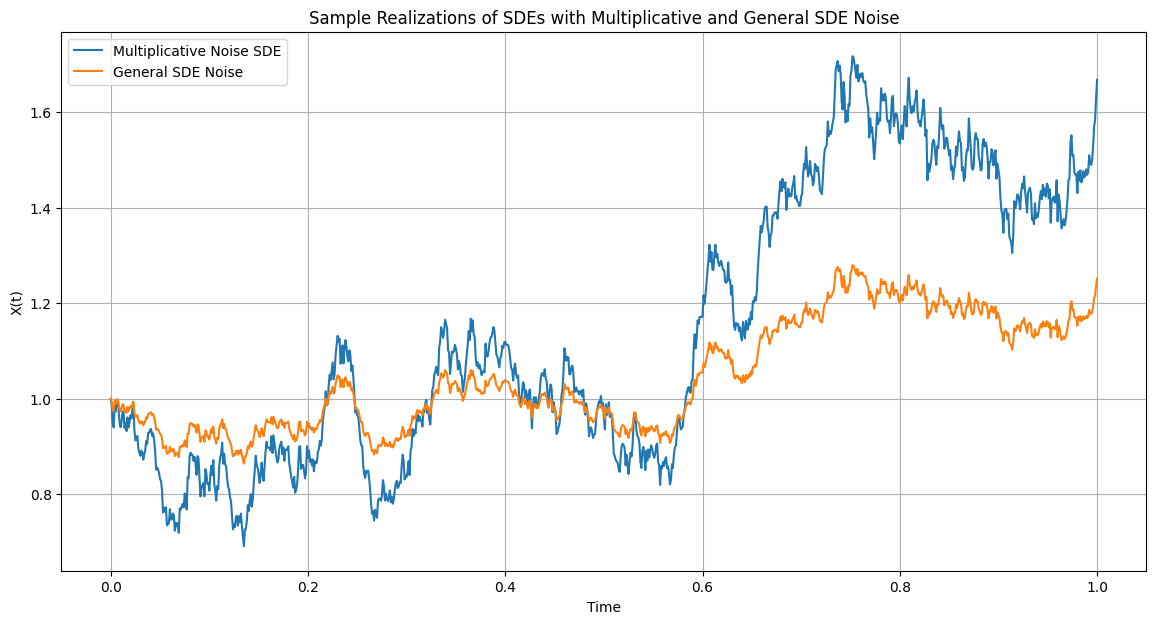

In [1]:
# Stochastic Differential Equations

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
T = 1.0  # Total time
N = 1000  # Number of time steps
dt = T / N  # Time step size
t = np.linspace(0, T, N+1)  # Time array

# Coefficients (example functions)
a1 = lambda t: 0.1
a2 = lambda t: 0.2
b1 = lambda t: 0.3
b2 = lambda t: 0.4

# Initial condition
X0 = 1.0

# Brownian motion
dW = np.random.normal(0, np.sqrt(dt), N)
W = np.cumsum(dW)

# Solution arrays
X_mult = np.zeros(N+1)
X_add = np.zeros(N+1)
X_mult[0] = X0
X_add[0] = X0

# Euler-Maruyama method for SDEs
for i in range(1, N+1):
    t_i = t[i-1]
    X_mult[i] = X_mult[i-1] + (a1(t_i) * X_mult[i-1] + a2(t_i)) * dt + (b1(t_i) * X_mult[i-1] + b2(t_i)) * dW[i-1]
    X_add[i] = X_add[i-1] + a1(t_i) * X_add[i-1] * dt + b1(t_i) * X_add[i-1] * dW[i-1]

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(t, X_mult, label='Multiplicative Noise SDE')
plt.plot(t, X_add, label='General SDE Noise')
plt.xlabel('Time')
plt.ylabel('X(t)')
plt.title('Sample Realizations of SDEs with Multiplicative and General SDE Noise')
plt.legend()
plt.grid(True)
plt.show()

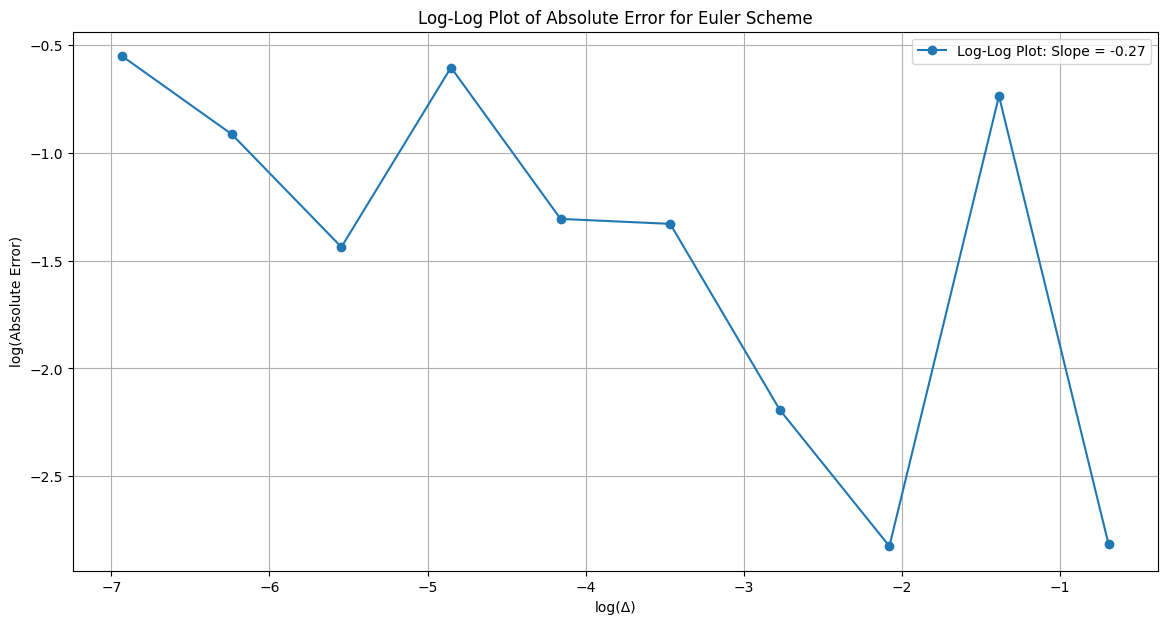

Regression Line: log(ε(Δ)) = -2.49993 + -0.26982 log(Δ)


In [2]:
#GBM log-log plot

# Parameters
X0 = 1       # Initial value
mu = 0.06    # Drift
sigma = 0.2  # Volatility
T = 1.0      # Time to maturity

# Exact solution for GBM
def gbm_exact(X0, mu, sigma, T, W_T):
    return X0 * np.exp((mu - 0.5 * sigma**2) * T + sigma * W_T)

# Euler-Maruyama scheme for GBM
def gbm_euler(X0, mu, sigma, T, dt, N):
    X = X0
    for t in range(N):
        Z = np.random.normal(0, 1)  # Brownian increment
        X = X * (1 + mu * dt + sigma * np.sqrt(dt) * Z)  # Euler update
    return X

# Discretization steps
delta_t_values = np.array([2**(-i) for i in range(1, 11)])  # Various time steps
errors = []

# Calculate absolute errors for different time steps
for delta_t in delta_t_values:
    N = int(T / delta_t)  # Number of steps
    W_T = np.sqrt(T) * np.random.normal(0, 1)  # Single Brownian motion at T
    exact_solution = gbm_exact(X0, mu, sigma, T, W_T)  # Exact solution
    euler_approx = gbm_euler(X0, mu, sigma, T, delta_t, N)  # Euler approximation

    # Calculate the absolute error
    abs_error = np.abs(exact_solution - euler_approx)
    errors.append(abs_error)

# Convert to logarithms for log-log plot
log_delta_t = np.log(delta_t_values)
log_errors = np.log(errors)

# Perform linear regression to fit the line
slope, intercept = np.polyfit(log_delta_t, log_errors, 1)

# Plotting the log-log plot of absolute error
plt.figure(figsize=(14, 7))
plt.plot(log_delta_t, log_errors, 'o-', label=f'Log-Log Plot: Slope = {slope:.2f}')
plt.xlabel('log(Δ)')
plt.ylabel('log(Absolute Error)')
plt.title('Log-Log Plot of Absolute Error for Euler Scheme')
plt.grid(True)
plt.legend()
plt.show()

print(f"Regression Line: log(ε(Δ)) = {intercept:.5f} + {slope:.5f} log(Δ)")
